In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('dataset/sales.csv')

In [6]:
#a = df[df['store'] == 'Lower Manhattan'].skew(numeric_only=True)
#print(a,b,c)
df_lower = df[df['store'] == 'Lower Manhattan']

In [7]:
df_lower.head() # Menampilkan 5 baris pertama dari data Lower Manhattan

,order_id,date,store,product,quantity,sales
0,1,01/01/2023,Lower Manhattan,Gourmet brewed coffee,2,6.0
1,2,01/01/2023,Lower Manhattan,Brewed Chai tea,2,6.2
2,3,01/01/2023,Lower Manhattan,Hot chocolate,2,9.0
3,4,01/01/2023,Lower Manhattan,Drip coffee,1,2.0
4,5,01/01/2023,Lower Manhattan,Brewed Chai tea,2,6.2


In [8]:
df_lower.shape # Menampilkan jumlah baris dan kolom (rows, columns)

(47782, 6)

In [9]:
df_lower.info() # Menampilkan informasi struktur data

<class 'pandas.core.frame.DataFrame'>
Index: 47782 entries, 0 to 149110
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  47782 non-null  int64  
 1   date      47782 non-null  object 
 2   store     47782 non-null  object 
 3   product   47782 non-null  object 
 4   quantity  47782 non-null  int64  
 5   sales     47782 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.6+ MB


In [10]:
df_lower.isnull().sum() # Mengecek jumlah nilai kosong (missing values) di setiap kolom

order_id    0
date        0
store       0
product     0
quantity    0
sales       0
dtype: int64

In [11]:
df_lower.describe() # Menampilkan statistik deskriptif untuk kolom numerik

,order_id,quantity,sales
count,47782.000000,47782.000000,47782.000000
mean,74756.294148,1.501444,4.814726
std,43137.409681,0.625618,3.280648
min,1.000000,1.000000,0.800000
25%,37287.250000,1.000000,3.000000
50%,74771.500000,1.000000,3.750000
75%,112020.750000,2.000000,6.000000
max,149451.000000,6.000000,72.000000


In [12]:
df_lower.mode() # Menampilkan nilai yang paling sering muncul (modus) di setiap kolom

,order_id,date,store,product,quantity,sales
0,1,13/06/2023,Lower Manhattan,Barista Espresso,1.0,3.0
1,2,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
47777,149386,NaN,NaN,NaN,NaN,NaN
47778,149387,NaN,NaN,NaN,NaN,NaN
47779,149388,NaN,NaN,NaN,NaN,NaN
47780,149435,NaN,NaN,NaN,NaN,NaN


In [13]:
df_lower['quantity'].describe() # Menampilkan statistik deskriptif khusus kolom quantity

count    47782.000000
mean         1.501444
std          0.625618
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: quantity, dtype: float64

In [14]:
df_lower.skew(numeric_only=True)  # Menghitung skewness (kemiringan distribusi) data numerik

order_id   -0.001563
quantity    0.887925
sales       4.616699
dtype: float64

In [15]:
df_lower.kurtosis(numeric_only=True) # Menghitung kurtosis (keruncingan distribusi) data numeri

order_id    -1.200878
quantity    -0.069625
sales       45.663105
dtype: float64

In [16]:
features = ['quantity', 'sales'] # Membuat list fitur numerik yang akan dianalisis

array([[<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

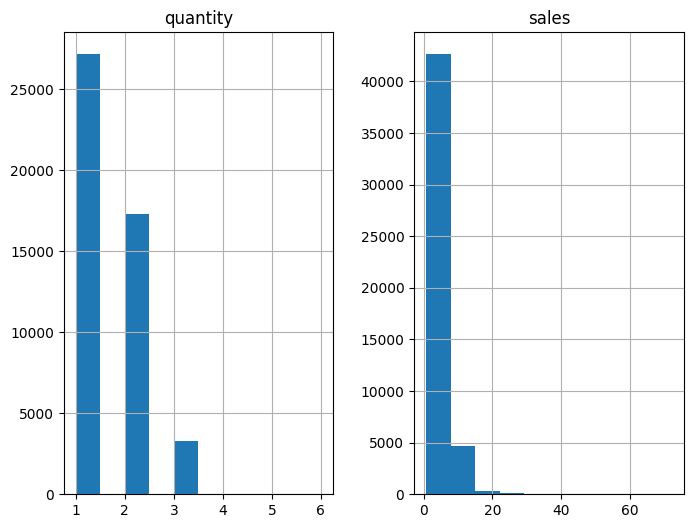

In [17]:
df_lower[features].hist(figsize=(8,6)) # Menampilkan histogram untuk setiap fitur numerik

array([[<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>]], dtype=object)

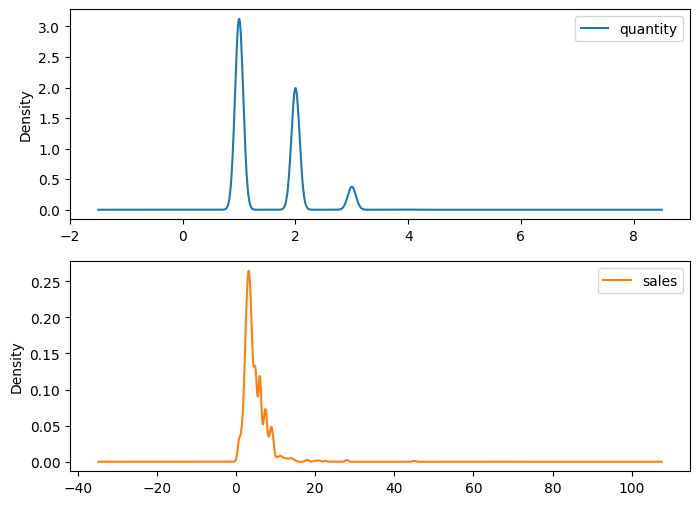

In [18]:
df_lower[features].plot(kind='density', subplots=True, layout=(2, 1), sharex=False,figsize=(8, 6)) # Menampilkan density plot (kurva distribusi) untuk setiap fitur

<Axes: xlabel='sales'>

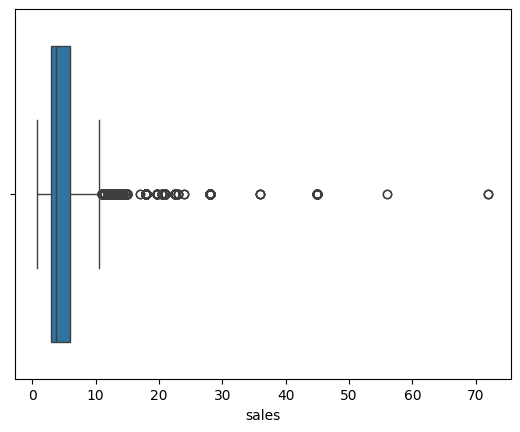

In [19]:
sns.boxplot(x='sales', data=df_lower) # Menampilkan boxplot untuk kolom sales

<Axes: xlabel='sales'>

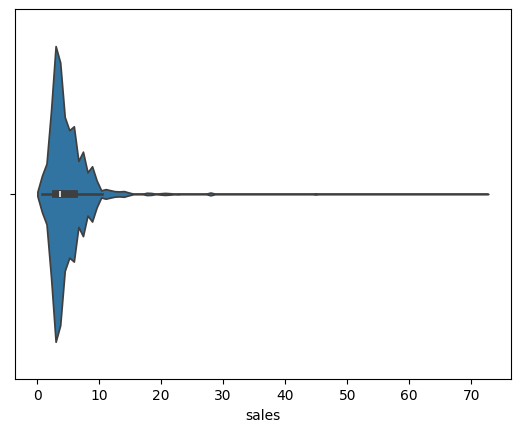

In [20]:
sns.violinplot(x='sales', data=df_lower) # Menampilkan violin plot untuk kolom sales

<Axes: xlabel='quantity', ylabel='count'>

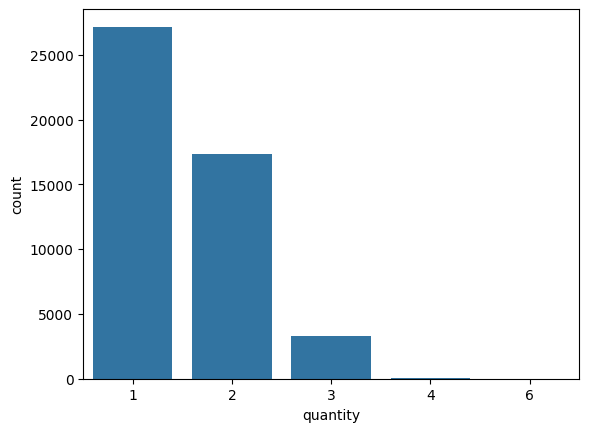

In [21]:
sns.countplot(x='quantity', data=df_lower) # Menampilkan jumlah kemunculan setiap nilai quantity

In [22]:
df_lower.corr(numeric_only=True) # Menghitung korelasi antar kolom numerik

,order_id,quantity,sales
order_id,1.000000,0.026944,0.014194
quantity,0.026944,1.000000,0.441262
sales,0.014194,0.441262,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

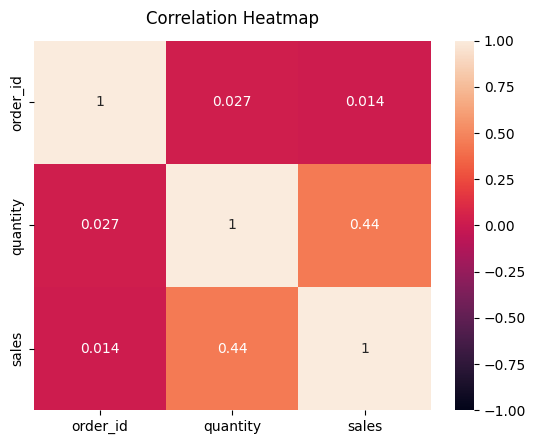

In [23]:
heatmap = sns.heatmap(df_lower.corr(numeric_only=True), vmin=-1, vmax=1, annot=True) # Membuat heatmap untuk visualisasi korelasi antar fitur numerik
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12) # Memberi judul pada heatmap

<Axes: xlabel='quantity', ylabel='sales'>

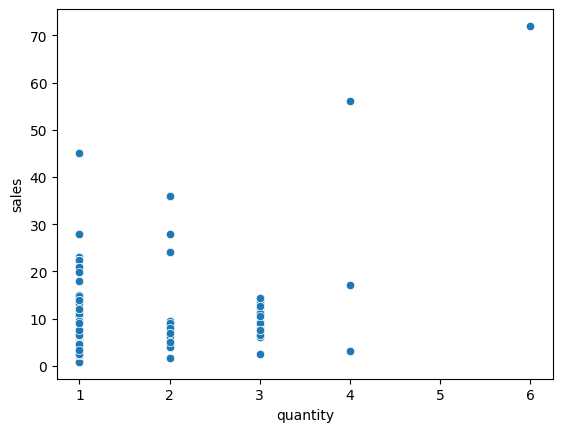

In [24]:
sns.scatterplot(x='quantity', y='sales', data=df_lower) # Menampilkan hubungan antara quantity dan sales

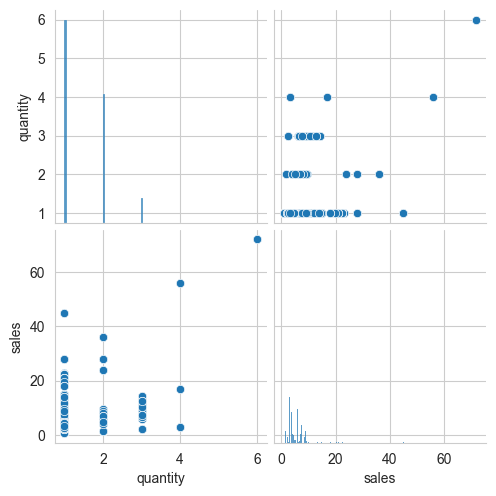

In [25]:
sns.set_style("whitegrid") # Mengatur gaya visual seaborn
sns.pairplot(df_lower[features]) # Menampilkan pairplot untuk fitur numerik

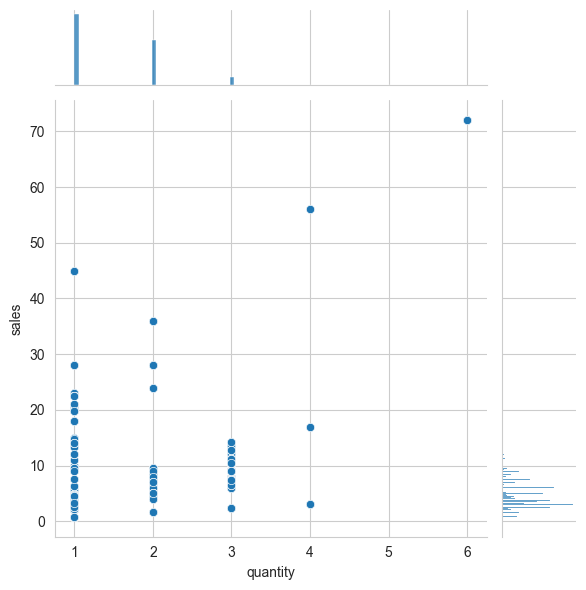

In [26]:
sns.jointplot(x='quantity', y='sales', data=df_lower) # Menampilkan hubungan antara quantity dan sales dengan jointplot

<Axes: xlabel='quantity', ylabel='sales'>

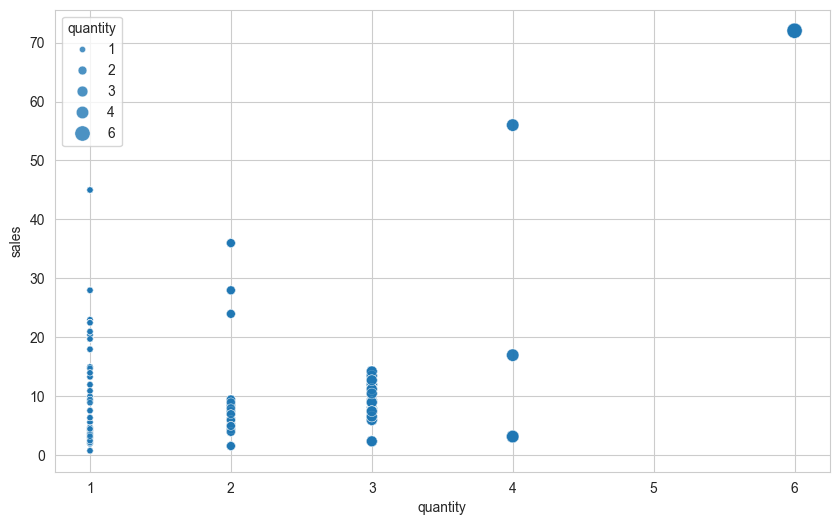

In [27]:
plt.figure(figsize=(10,6)) 
sns.scatterplot(
    x='quantity',
    y='sales',
    size='quantity',
    sizes=(20, 120),
    alpha=0.8,
    data=df_lower
) # Membuat scatter plot dengan ukuran titik berdasarkan quantity

In [ ]:
"""
Conclusion
Berdasarkan analisis yang telah dilakukan, proses eksplorasi data difokuskan pada transaksi toko Lower Manhattan menggunakan Jupyter Notebook. Data disaring terlebih dahulu untuk memastikan analisis dilakukan pada toko yang relevan, kemudian dilakukan pemeriksaan struktur data dan statistik deskriptif guna memahami karakteristik variabel yang dianalisis.
Hasil analisis menunjukkan bahwa variabel sales merupakan data numerik kontinu sehingga sesuai divisualisasikan menggunakan grafik distribusi seperti boxplot dan violin plot. Sementara itu, variabel quantity bersifat numerik diskrit sehingga lebih tepat dianalisis menggunakan grafik berbasis frekuensi seperti countplot. Pemilihan jenis visualisasi disesuaikan dengan karakteristik data agar hasil analisis lebih akurat dan informatif.
Selain itu, hubungan antara quantity dan sales dianalisis menggunakan scatter plot dan korelasi untuk melihat pola penjualan. Parameter hue tidak digunakan karena dataset tidak memiliki variabel kategorikal sebagai label atau kelas pembeda. Secara keseluruhan, analisis ini menegaskan pentingnya pemahaman terhadap jenis data dalam menentukan metode analisis dan visualisasi yang tepat.
"""